<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project: Vehicle Insurance Fraud Detection

## 1. Background

Vehicle insurance fruad detection is becoming a critical issue in the insurance industry in Singapore. The General Insurance Assoication of Singapore (GIA) estimates that fraud accounts for up to 10% of total claims cost, which can result in significant financial losses for insurance companies and increased premiums for honest policyholders. 

In recent years, the number of suspecious motor insurance claims has been on the rise. In 2020, the GIA report a 27% increase in suspicious claims as compared to the previous year. The most common types of motor insurance fraud in Singapore include stageda accidents, false injury claims, and inflated damage claims.

To combat fraud, insurance companies in Singapore use various methods to dtect fraudulent activity. These methods include data analytics, investigation teams, and collaboration with external agencies. Insurance companies analyse data from various sources, such as police reports, accident data, and historical data claims to help identify patterns that indicate potential fraud. 

The consequences for committing insurace fraud in Singapore can be severe with Fraudsters facing criminal charges, fines and iimprisonment, as well as loss of insurance coverage and difficulty in obtaining insurance in the future. 

These facts demonstrate the significant impact of the insurance fraud on the motor insurance industry in Singapore and the importance of detecting and preventing it to protect honest policyholders and maintain the financial stability of insurance companies. The use of advanced techniques and collaboration between insurance companies, regulatory bodies, and law enforcement agencies can help to deter fraudulent activities and ensure a fair and sustainable insurance market in Singapore.

1. General Insurance Association of Singapore (GIA) Report on Insurance Fraud in Singapore (https://www.gia.org.sg/docs/default-source/default-document-library/gia-report-on-insurance-fraud-in-singapore.pdf)

2. GIA News Release on Increase in Suspicious Motor Insurance Claims in Singapore (https://www.gia.org.sg/Media-Room/News-Releases/2021/News-Release-29-Mar-2021)

3. Singapore Police Force's Advisory on Staged Accidents (https://www.police.gov.sg/resources/traffic-matters/advisory-on-staged-accidents)


4. Straits Times Article on Rise of Insurance Fraud in Singapore (https://www.straitstimes.com/singapore/courts-crime/more-insurance-fraud-cases-in-singapore-amid-pandemic)

5. Asia Insurance Review Article on Fraud Detection in Singapore (https://www.asiainsurancereview.com/Magazine/ReadMagazineArticle/aid/44109/Fraud-detection-in-Singapore)


## 2. Problem Statement


As a data analyst working for Marina Bay Insurance in Singapore, I was tasked to develop an advanced fraud detection system to identify and prevent insurance fraud. The system must be able to analyze large amounts of data from various sources and incorporate advanced analytics and machine learning algorithms to continually improve its fraud detection capabilities. The challenge is to accurately and efficiently detect fraudulent activity while minimizing the impact on legitimate claims processing. The success of the system will depend on its ability to provide prompt and fair claims processing for honest policyholders while preventing significant financial losses for the company due to fraudulent claims.

##  3. Dataset

The Oracle Vehicle Fraud Dataset is a synthetic dataset created by Oracle for use in fraud detection research and testing. It consists of transactional data related to the purchase and sale of vehicles, and includes a range of features such as customer demographics, vehicle characteristics, and transaction details. The dataset aims to provide a realistic and representative sample of transactional data that can be used to evaluate and compare the performance of different fraud detection models and techniques. The goal of the dataset is to enable researchers and practitioners to develop and test effective fraud detection solutions for the automotive industry.

## Part I: Data Cleaning & EDA

### Import Libraries / Datasets

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss
from scipy.stats import f_oneway, norm
from collections import Counter
import math
from itertools import product


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay, recall_score, precision_score

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression



df = pd.read_csv('./datasets/fraud_oracle.csv')

### Viewing of Dataset

In [2]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

### Checking for null values

In [4]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [26]:
df.shape

(15419, 33)

### Exploring the unique values in each column of a DataFrame

In [5]:
for column in df:
    if column == 'PolicyNumber':
        pass
    else:
        print(column)
        print(sorted(df[column].unique()))
        print()

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

WeekOfMonth
[1, 2, 3, 4, 5]

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW']

AccidentArea
['Rural', 'Urban']

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

WeekOfMonthClaimed
[1, 2, 3, 4, 5]

Sex
['Female', 'Male']

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow']

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,

### Observation

- DayOfWeekClaimed,MonthClaimed,Age has 0 value
- Policy type is a cominbation of both Car Category and Base Policy
- Policy number is not needed as it only signify the number of policy

In [6]:
df[df['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [7]:
df[df['MonthClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [8]:
df[df['Age'] == 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


### Cleaning and impute of missing values

In [9]:
#filtering out the MonthClaimed row that has '0'
df = df[~(df['MonthClaimed'] == '0')]

In [10]:
#Calculating the missing age 
df[df['Age'] == 0]['AgeOfPolicyHolder'].unique()

#Imputing the average
df['Age'] = df['Age'].replace({0:16.5})

### EDA

Total Number of claims
0    14496
1      923
Name: FraudFound_P, dtype: int64


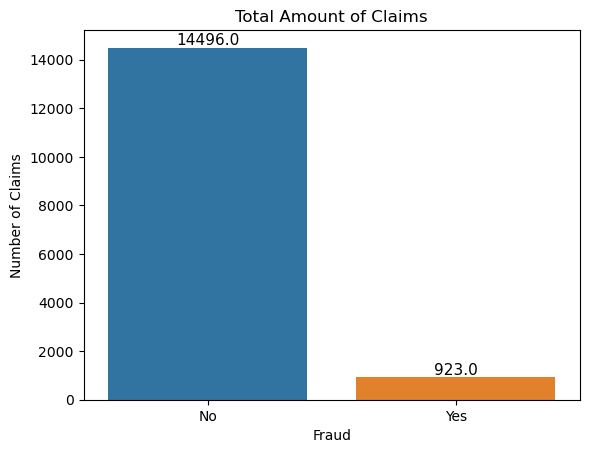

In [11]:
#Finding proportion between fraud and non fraud cases 

print('Total Number of claims')
fraud_counts = df['FraudFound_P'].value_counts()
print(fraud_counts)

sns.countplot(x = 'FraudFound_P', data = df)
plt.title ('Total Amount of Claims')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Fraud')
plt.ylabel('Number of Claims');

ax = plt.gca()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='Black', xytext=(0, 5), 
                textcoords='offset points')

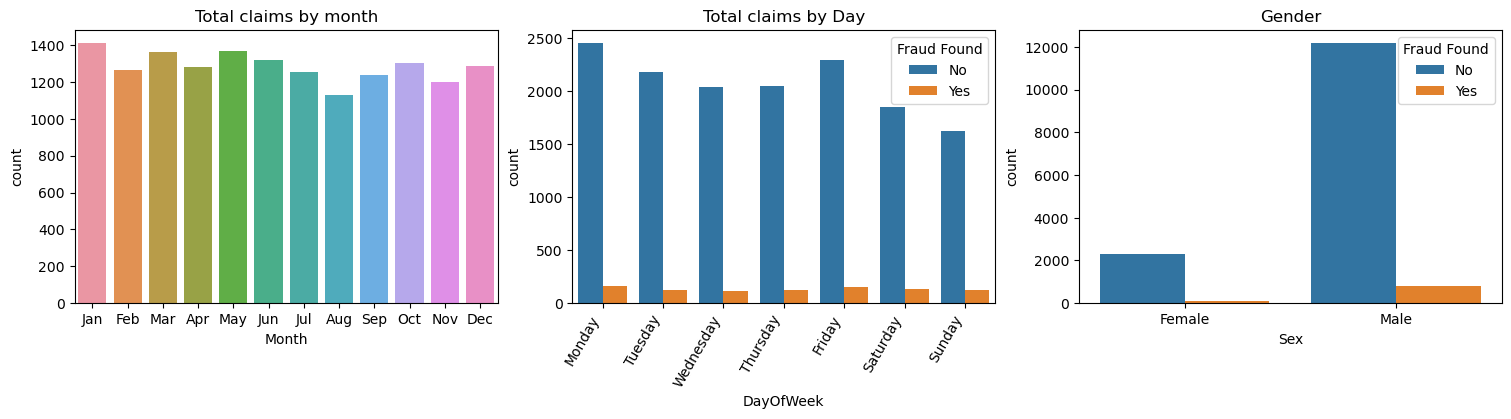

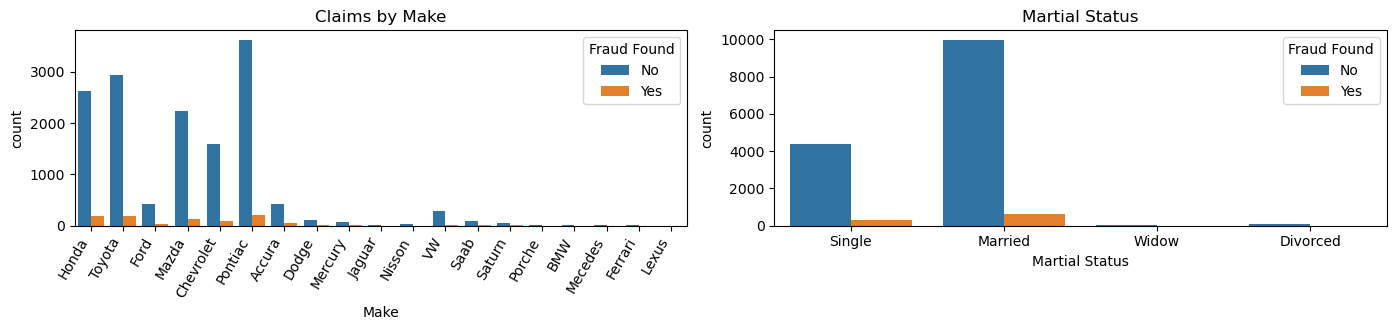

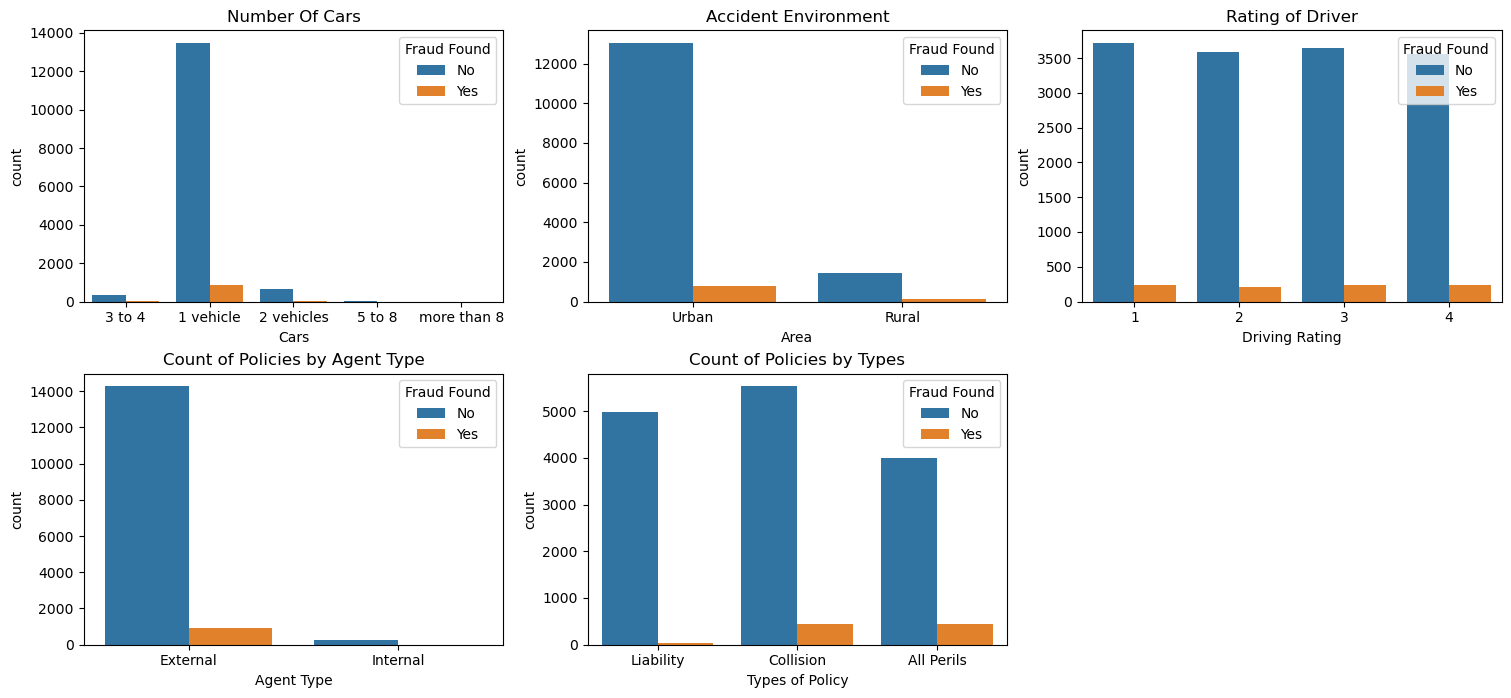

In [12]:
plt.figure(figsize=(15,15),constrained_layout=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplot(5,3,1)
sns.countplot(data=df, x='Month',order=month_order)
plt.title('Total claims by month')

plt.subplot(5,3,2)
sns.countplot(data=df, x='DayOfWeek',hue='FraudFound_P',order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.xticks(rotation = 60, horizontalalignment = 'right')
plt.title('Total claims by Day')

plt.subplot(5,3,3)
sns.countplot(data=df,x='Sex',hue='FraudFound_P')
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.title('Gender')

plt.figure(figsize=(20,11),constrained_layout=True)
plt.subplot(5,3,4)
sns.countplot(data=df,x='Make',hue='FraudFound_P')
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.xticks(rotation = 60, horizontalalignment = 'right')
plt.title('Claims by Make');

plt.subplot(5,3,5)
sns.countplot(data=df,x='MaritalStatus',hue='FraudFound_P')
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.xlabel('Martial Status')
plt.title('Martial Status')

plt.figure(figsize=(15,15),constrained_layout=True)
plt.subplot(5,3,7)
sns.countplot(data=df,x='NumberOfCars',hue='FraudFound_P')
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.xlabel('Cars')
plt.title('Number Of Cars')

plt.subplot(5,3,8)
sns.countplot(data=df,x='AccidentArea',hue='FraudFound_P')
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.xlabel('Area')
plt.title('Accident Environment')

plt.subplot(5,3,9)
sns.countplot(data=df,x='DriverRating',hue='FraudFound_P')
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.xlabel('Driving Rating')
plt.title('Rating of Driver')

plt.subplot(5,3,10)
sns.countplot(data=df,x='AgentType',hue='FraudFound_P')
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.xlabel('Agent Type')
plt.title('Count of Policies by Agent Type')

plt.subplot(5,3,11)
sns.countplot(data=df,x='BasePolicy',hue='FraudFound_P')
plt.legend(title = 'Fraud Found', labels = ['No','Yes'])
plt.xlabel('Types of Policy')
plt.title('Count of Policies by Types');



#### Policy Types

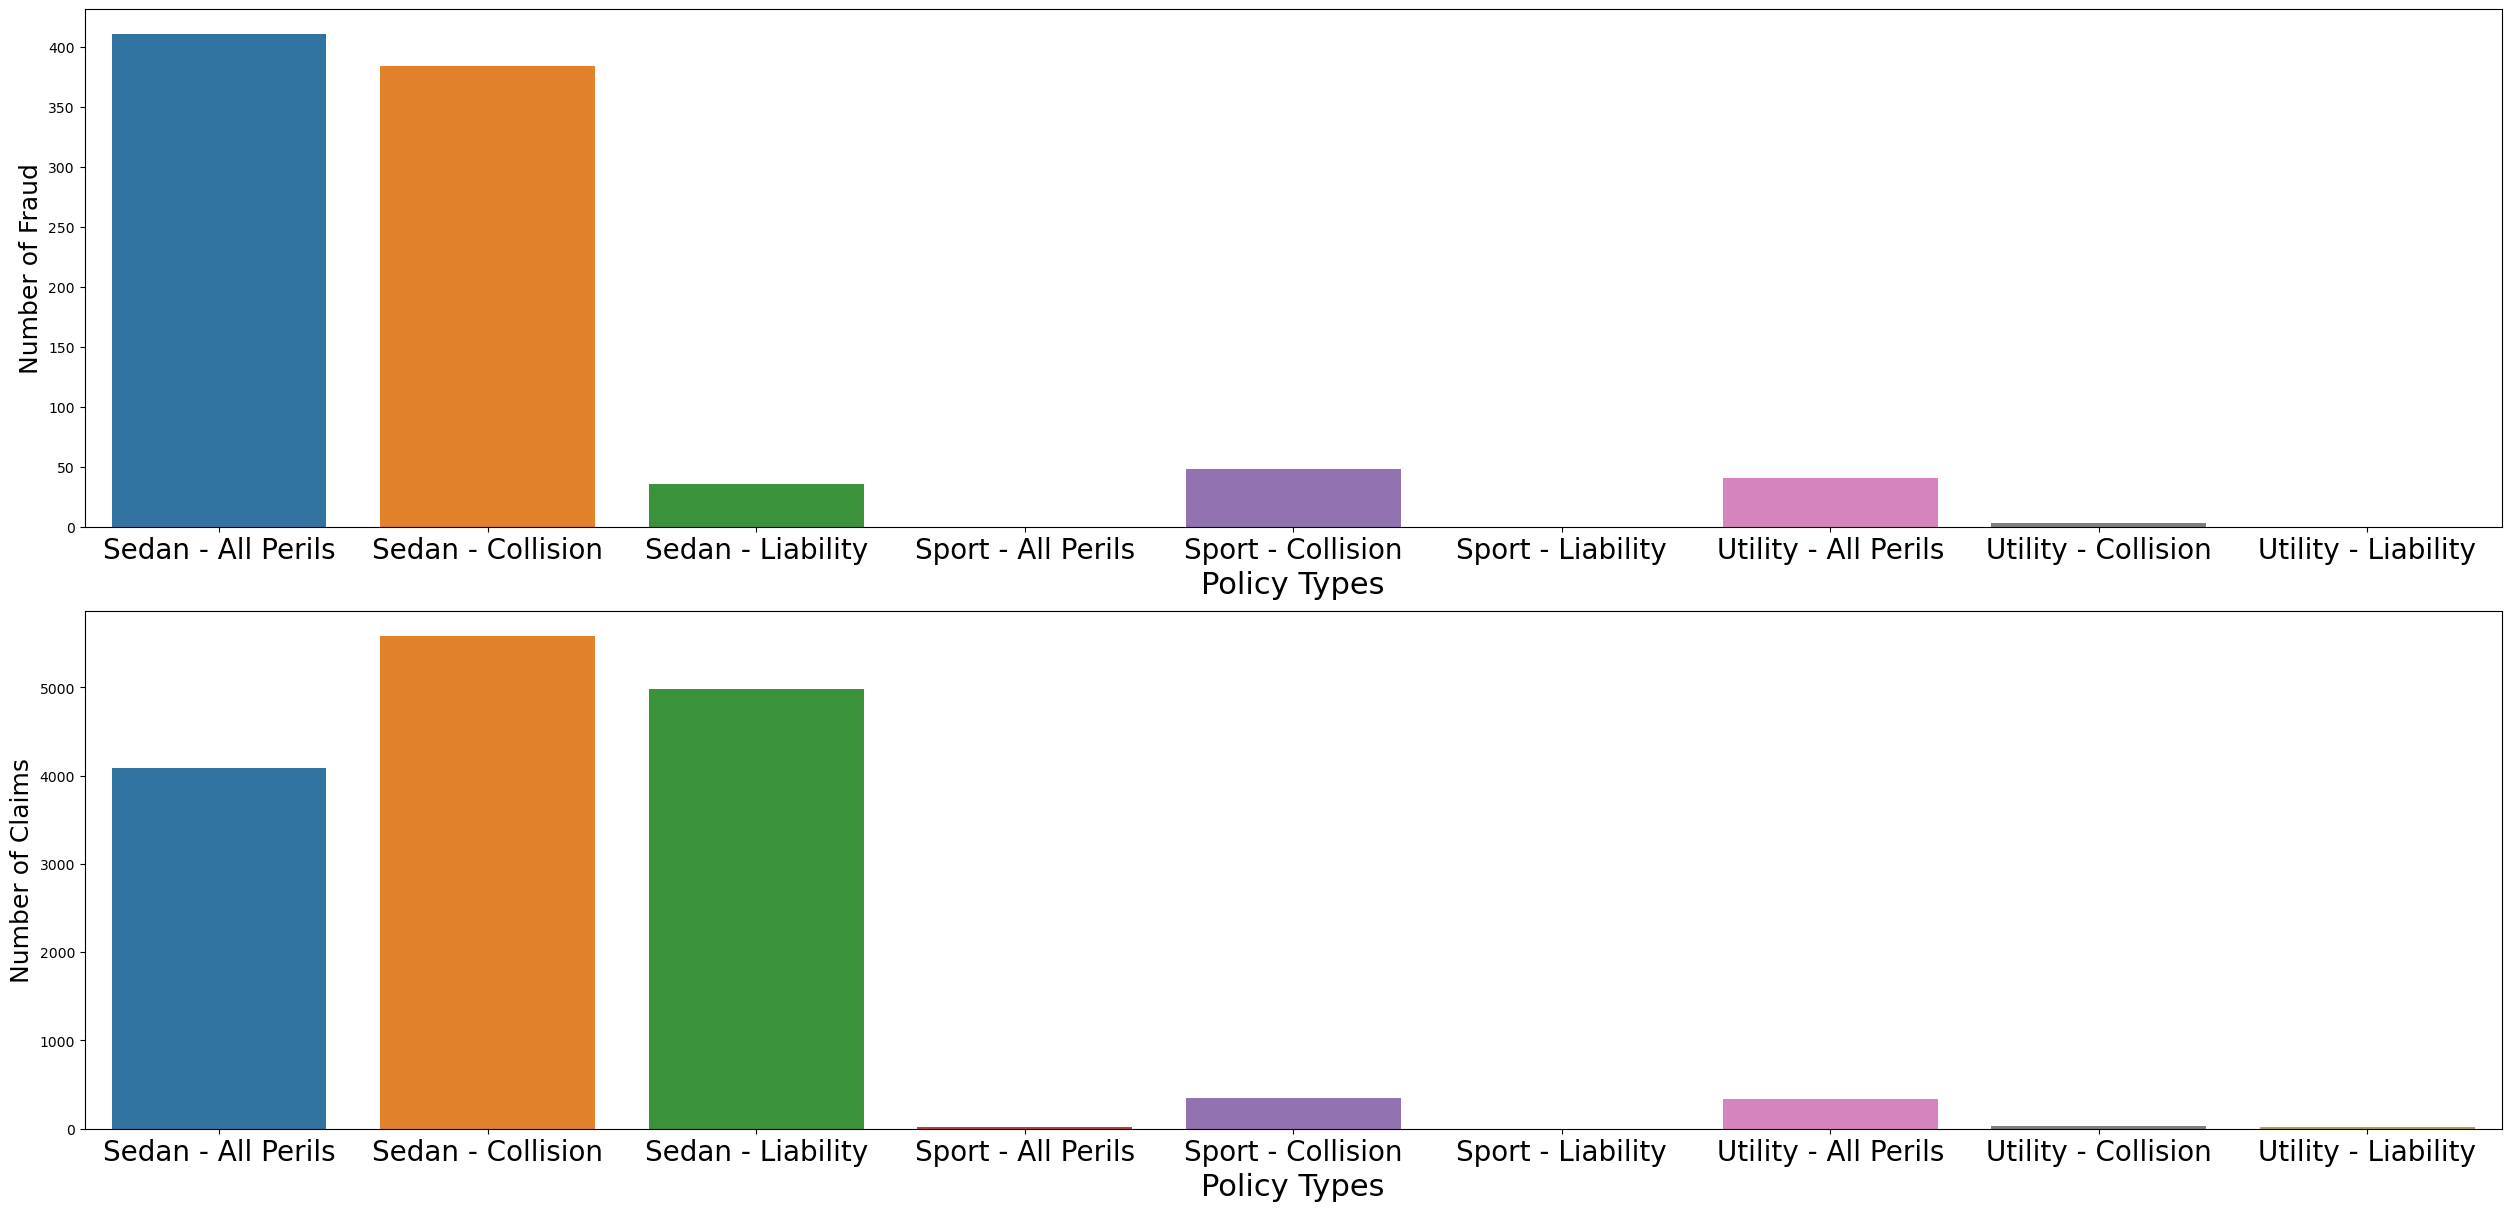

In [13]:
#We will want to see if the type of policy have any correlationship with Fraud.
#This code shows the number of Fraud per policy type
df_grouped1 = df.groupby('PolicyType').agg({'FraudFound_P': 'sum'}).reset_index()
#This code shows total number of claims per policy type 
df_grouped2 = df.groupby('PolicyType').agg({'FraudFound_P': 'count'}).reset_index()

plt.figure(figsize=(25,12),constrained_layout=True)
plt.subplot(2,1,1)
sns.barplot(data = df_grouped1, x='PolicyType',y='FraudFound_P')
plt.xticks(fontsize = 20)
plt.xlabel('Policy Types',fontsize = 22)
plt.ylabel('Number of Fraud', fontsize = 18)

plt.subplot(2,1,2)
sns.barplot(data = df_grouped2, x='PolicyType',y='FraudFound_P')
plt.xticks(fontsize = 20)
plt.xlabel('Policy Types',fontsize = 22)
plt.ylabel('Number of Claims', fontsize = 18);

In [14]:
df_merged = df_grouped1.merge(df_grouped2, on = 'PolicyType', how = 'inner')
df_merged = df_merged.rename(columns={'FraudFound_P_x': 'FraudFound','FraudFound_P_y': 'Total Accidents'})

df_merged['Percentage by PolicyType']=round((df_merged['FraudFound']/df_merged['Total Accidents'])*100,3)
df_merged['Percentage by Total'] =round((df_merged['FraudFound']/sum(df_merged['Total Accidents']))*100,3)

df_merged

,PolicyType,FraudFound,Total Accidents,Percentage by PolicyType,Percentage by Total
0,Sedan - All Perils,411,4086,10.059,2.666
1,Sedan - Collision,384,5584,6.877,2.490
2,Sedan - Liability,36,4987,0.722,0.233
3,Sport - All Perils,0,22,0.000,0.000
4,Sport - Collision,48,348,13.793,0.311
5,Sport - Liability,0,1,0.000,0.000
6,Utility - All Perils,41,340,12.059,0.266
7,Utility - Collision,3,30,10.000,0.019
8,Utility - Liability,0,21,0.000,0.000


**Comments:** The highest percentage of fraud per policyType was recorded to be Sport - Collision at 13.7% while sedan - all perils has the highest percentage of fraud at 2.66% for overall total accident.

#### Car Make

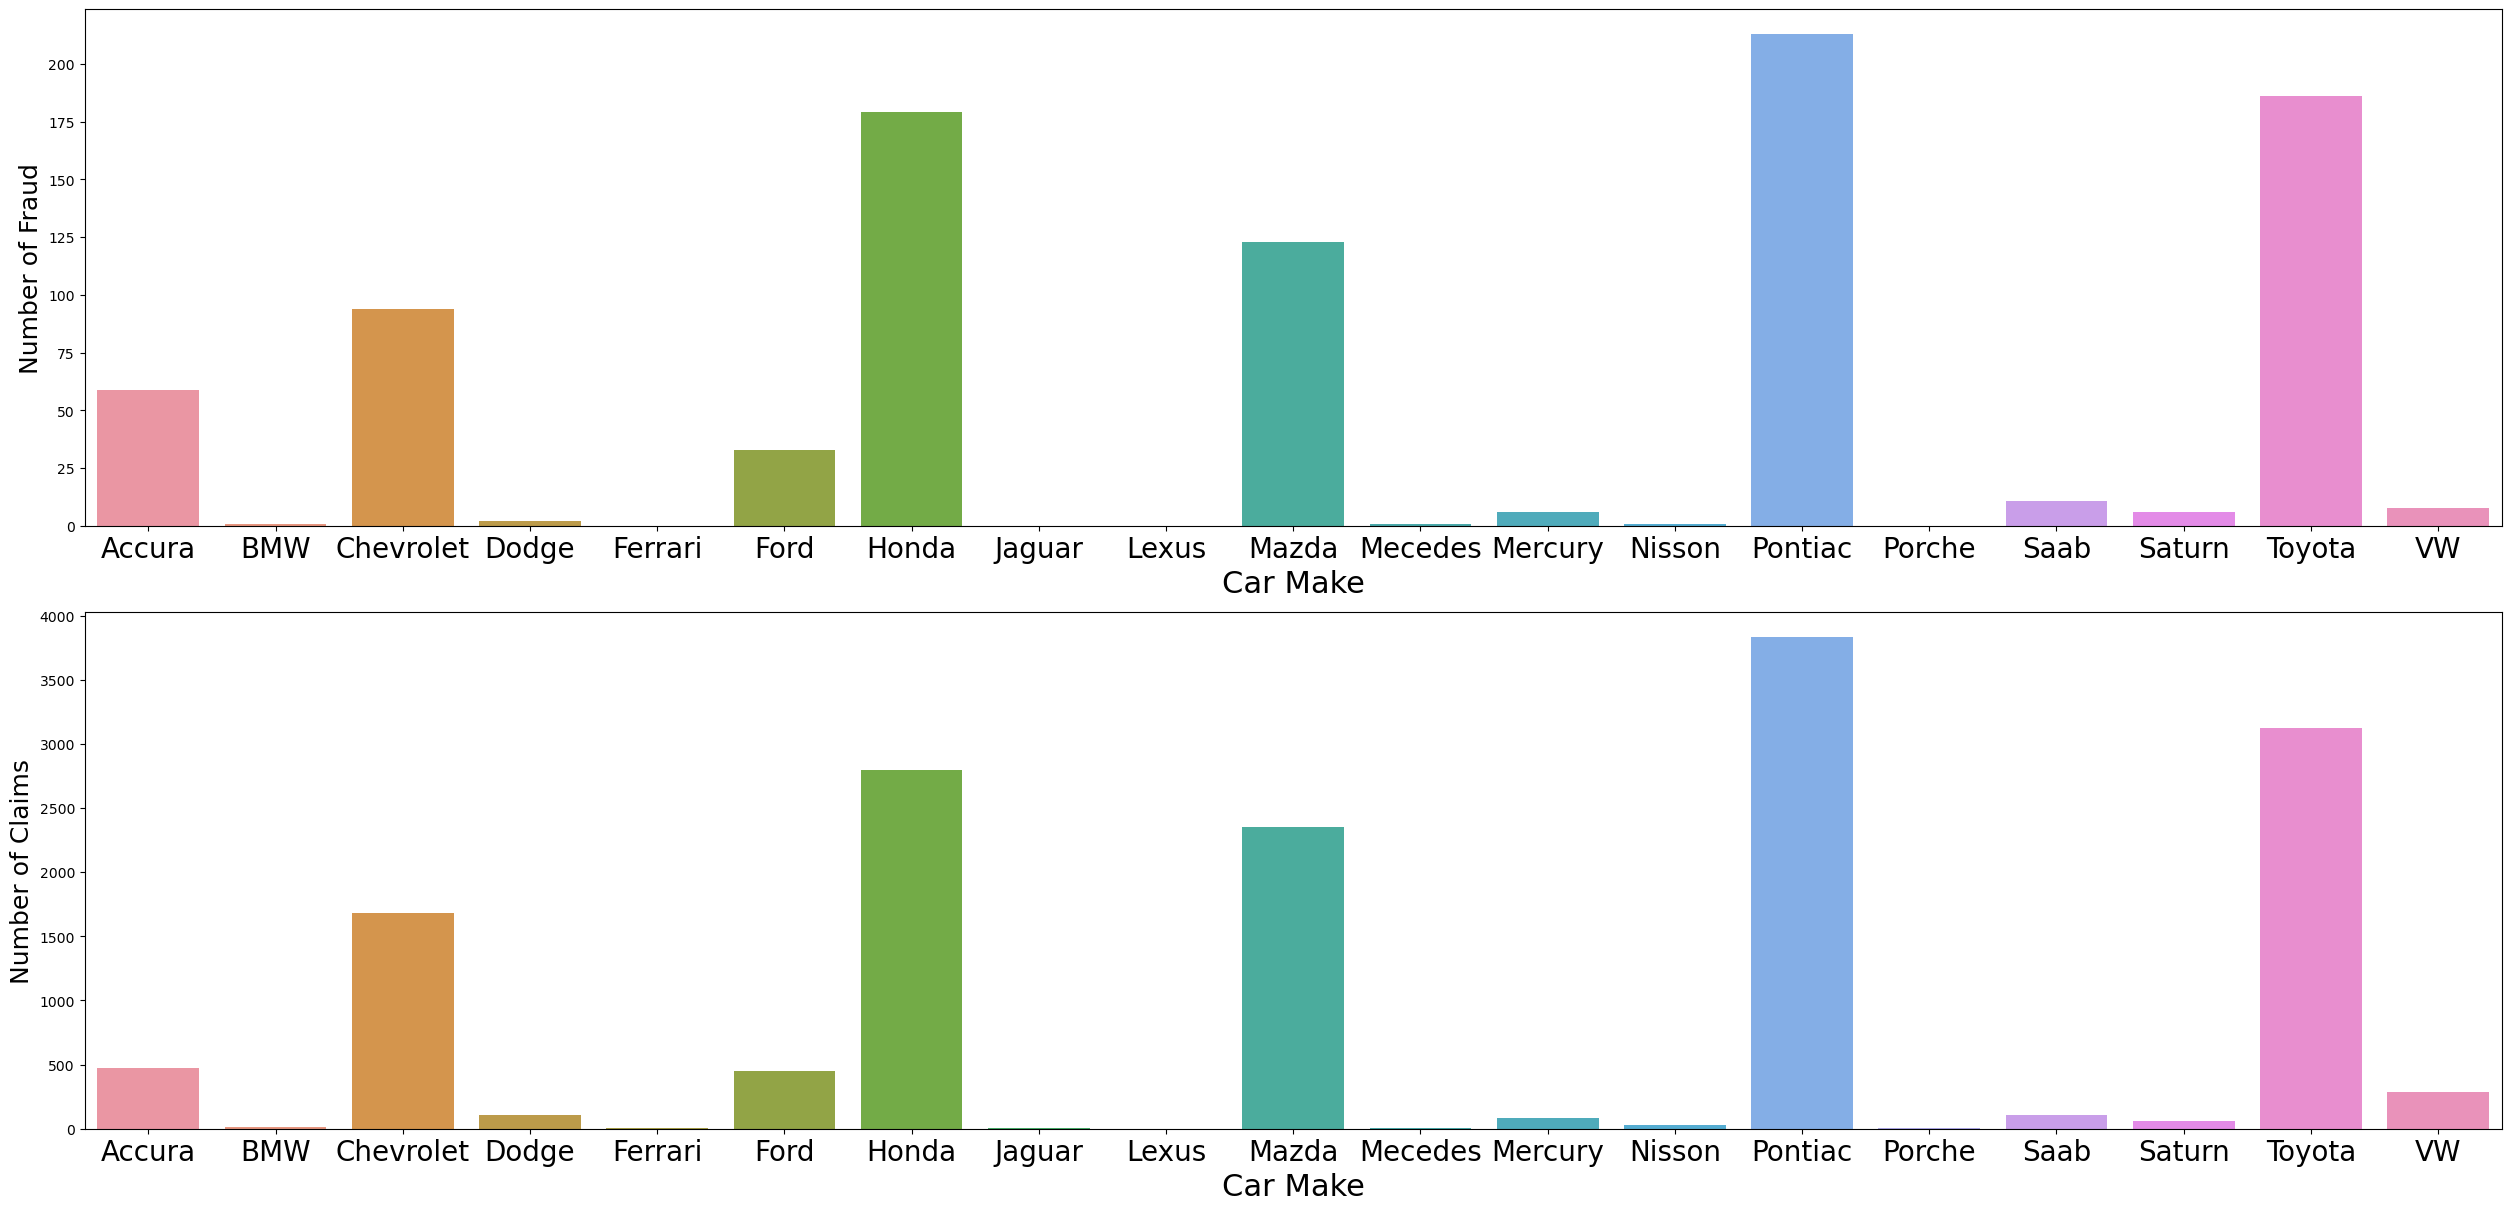

In [15]:
df_make1 = df.groupby('Make').agg({'FraudFound_P': 'sum'}).reset_index()
#This code shows total number of claims per policy type 
df_make2 = df.groupby('Make').agg({'FraudFound_P': 'count'}).reset_index()

plt.figure(figsize=(25,12),constrained_layout=True)
plt.subplot(2,1,1)
sns.barplot(data = df_make1, x='Make',y='FraudFound_P')
plt.xticks(fontsize = 20)
plt.xlabel('Car Make',fontsize = 22)
plt.ylabel('Number of Fraud', fontsize = 18)

plt.subplot(2,1,2)
sns.barplot(data = df_make2, x='Make',y='FraudFound_P')
plt.xticks(fontsize = 20)
plt.xlabel('Car Make',fontsize = 22)
plt.ylabel('Number of Claims', fontsize = 18);

In [16]:
df_merged_car = df_make1.merge(df_make2, on = 'Make', how = 'inner')
df_merged_car = df_merged_car.rename(columns={'FraudFound_P_x': 'FraudFound','FraudFound_P_y': 'Total Accidents'})

df_merged_car['Percentage by Make']=round((df_merged_car['FraudFound']/df_merged_car['Total Accidents'])*100,3)
df_merged_car['Percentage by Total'] =round((df_merged_car['FraudFound']/sum(df_merged_car['Total Accidents']))*100,3)


df_merged_car

,Make,FraudFound,Total Accidents,Percentage by Make,Percentage by Total
0,Accura,59,472,12.500,0.383
1,BMW,1,15,6.667,0.006
2,Chevrolet,94,1681,5.592,0.610
3,Dodge,2,109,1.835,0.013
4,Ferrari,0,2,0.000,0.000
5,Ford,33,450,7.333,0.214
6,Honda,179,2800,6.393,1.161
7,Jaguar,0,6,0.000,0.000
8,Lexus,0,1,0.000,0.000
9,Mazda,123,2354,5.225,0.798


#### Vehicle Category & Base Policy

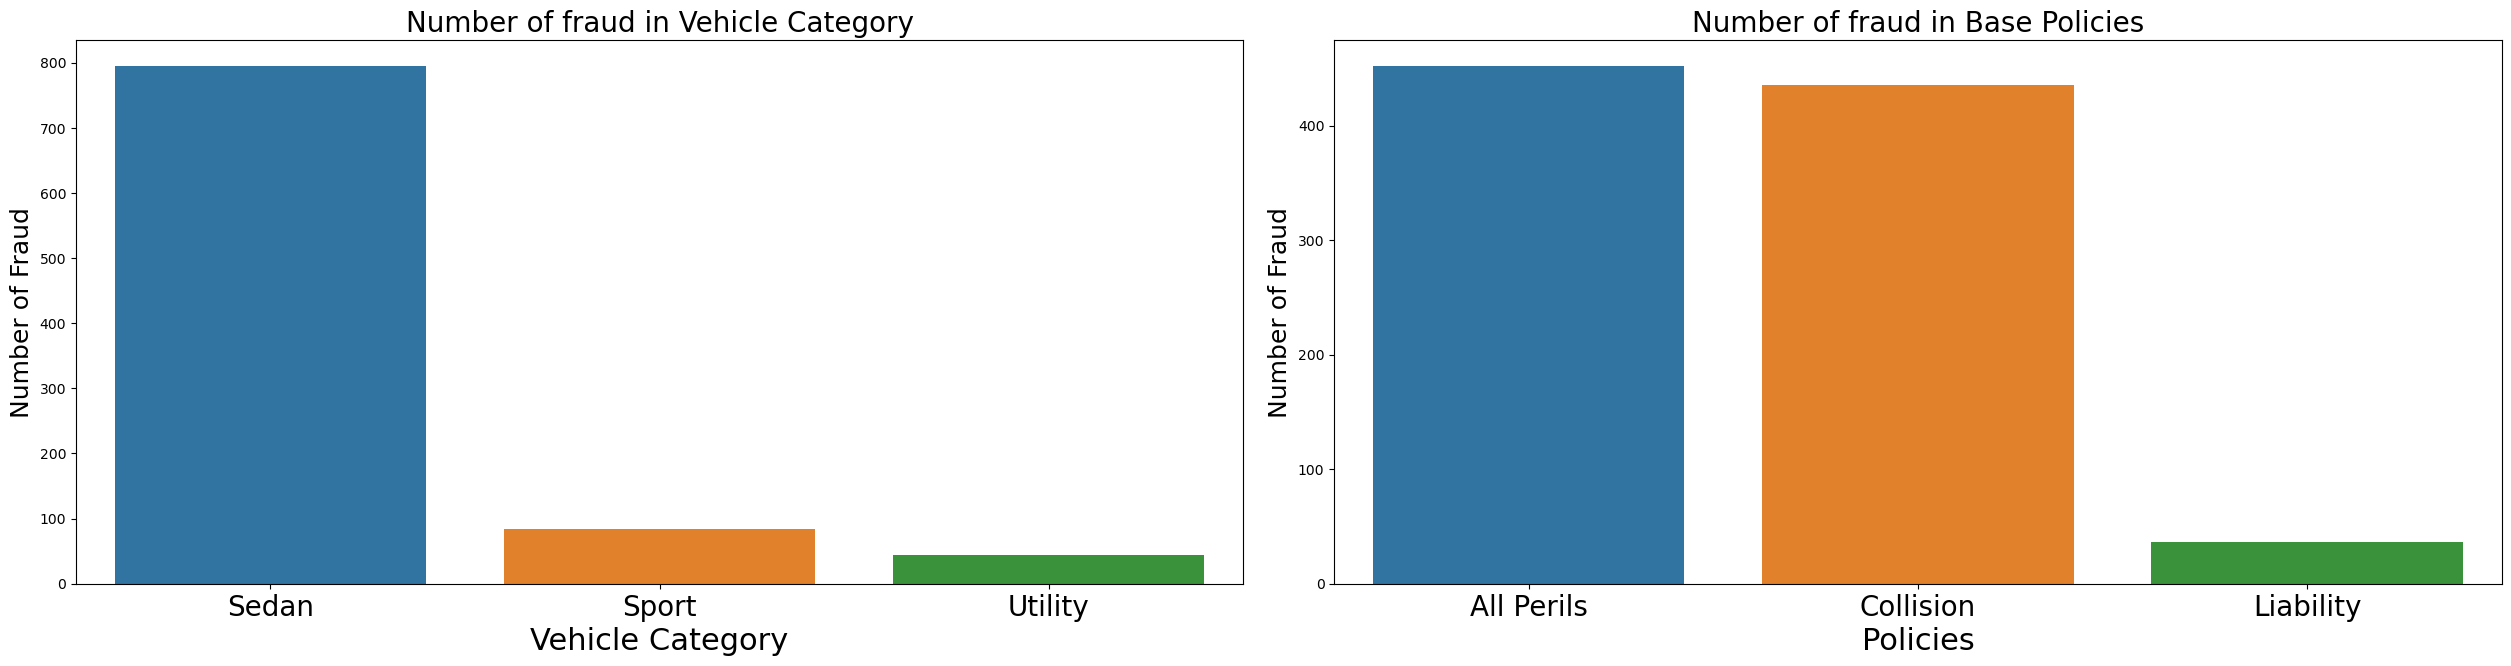

In [17]:
df_vehcat1 =df.groupby('VehicleCategory').agg({'FraudFound_P': 'sum'}).reset_index()
df_vehcat2 = df.groupby('VehicleCategory').agg({'FraudFound_P': 'count'}).reset_index()

df.bp1 =df.groupby('BasePolicy').agg({'FraudFound_P': 'sum'}).reset_index()
df_bp2 = df.groupby('BasePolicy').agg({'FraudFound_P': 'count'}).reset_index()

plt.figure(figsize=(25,12),constrained_layout=True)
plt.subplot(2,2,1)
sns.barplot(data = df_vehcat1, x='VehicleCategory',y='FraudFound_P')
plt.xticks(fontsize = 20)
plt.xlabel('Vehicle Category',fontsize = 22)
plt.ylabel('Number of Fraud', fontsize = 18)
plt.title("Number of fraud in Vehicle Category",fontsize = 20)

plt.subplot(2,2,2)
sns.barplot(data = df.bp1, x='BasePolicy',y='FraudFound_P')
plt.xticks(fontsize = 20)
plt.xlabel('Policies',fontsize = 22)
plt.ylabel('Number of Fraud', fontsize = 18)
plt.title("Number of fraud in Base Policies", fontsize = 20);

### Correlation Matrix

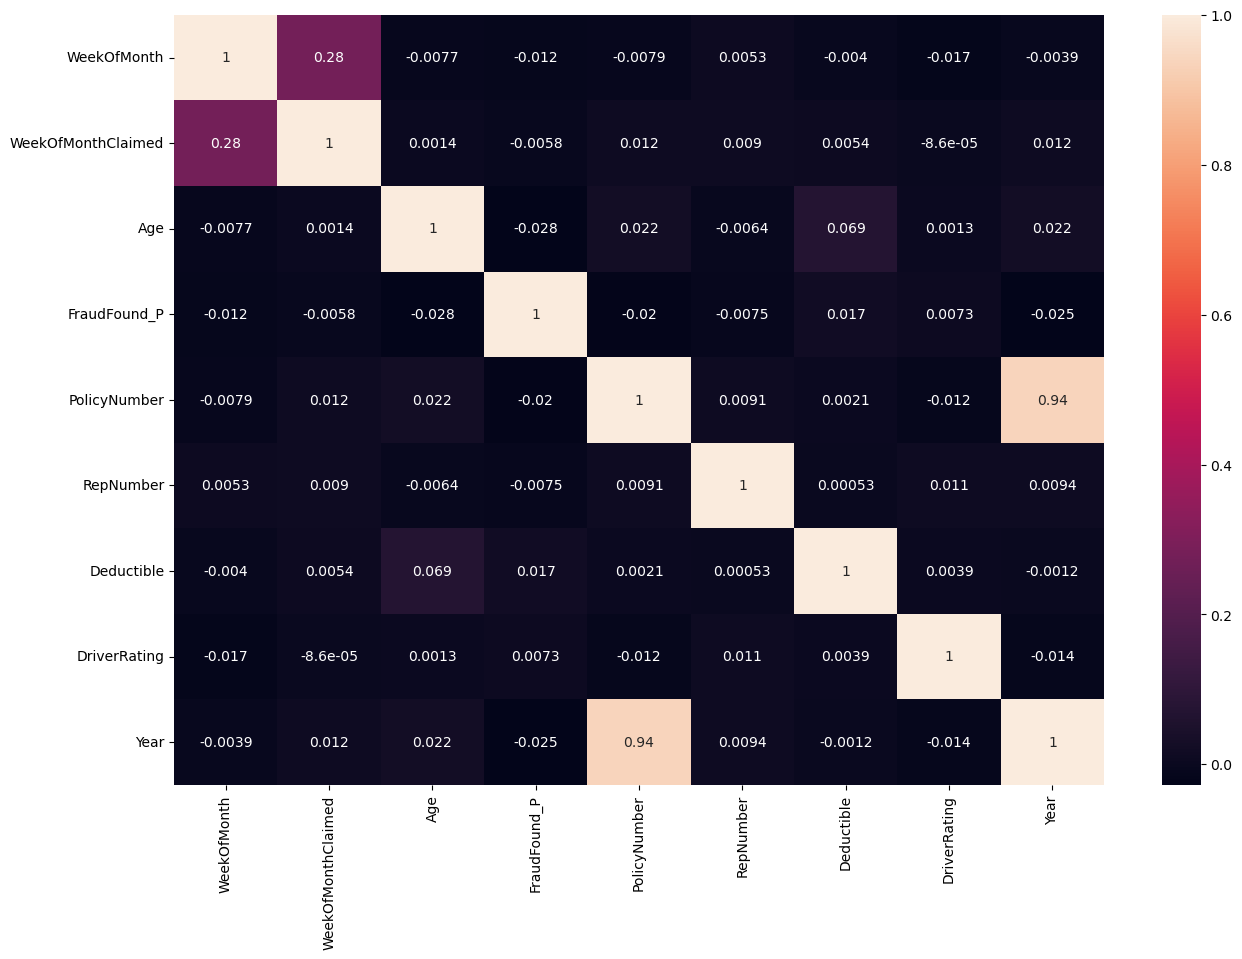

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Export cleaned dataframe

In [19]:
df.to_csv('./datasets/cleaned_fraud_oracle.csv', index=False)

In [21]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
